Fetching unemployment rate data...

Unemployment Rate Data Summary:
Date range: 2000-01-01 00:00:00 to 2024-10-01 00:00:00
Total observations: 298

First few observations:
        date  value
0 2000-01-01    4.0
1 2000-02-01    4.1
2 2000-03-01    4.0
3 2000-04-01    3.8
4 2000-05-01    4.0

Most recent observations:
          date  value
293 2024-06-01    4.1
294 2024-07-01    4.3
295 2024-08-01    4.2
296 2024-09-01    4.1
297 2024-10-01    4.1

Basic Statistics:
Average unemployment rate: 5.70%
Minimum unemployment rate: 3.40%
Maximum unemployment rate: 14.80%


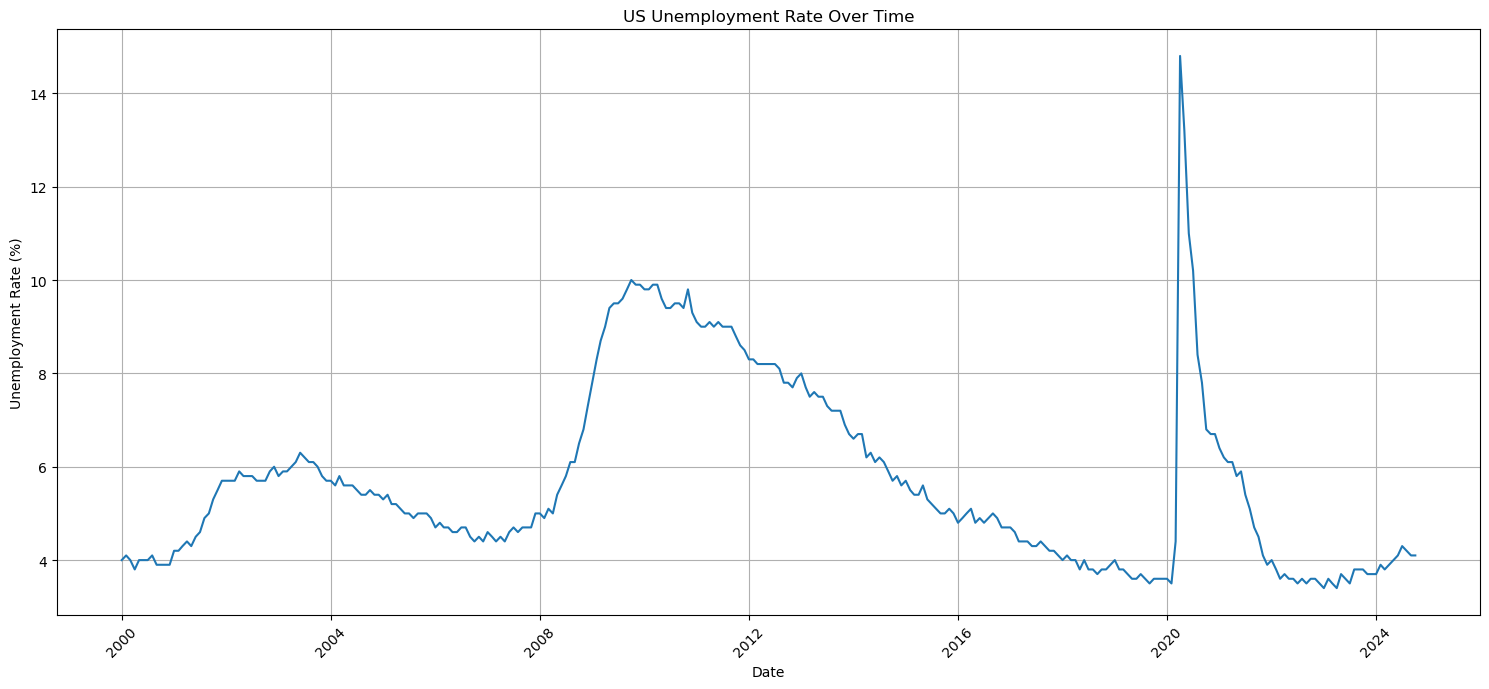

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_fred_data(series_id, api_key, start_date=None, end_date=None):
    """
    Fetch time series data from FRED API with improved error handling
    """
    base_url = "https://api.stlouisfed.org/fred/series/observations"
    
    # Parameters for the API request
    params = {
        'series_id': series_id,
        'api_key':"6a913b6f7ce8cfdfb749baae1733347f",
        'file_type': 'json',
        'observation_start': start_date if start_date else '1950-01-01',  # Extended start date
        'observation_end': end_date if end_date else datetime.now().strftime('%Y-%m-%d')
    }
    
    headers = {
        'Accept': 'application/json',
        'User-Agent': 'Mozilla/5.0'
    }
    
    try:
        response = requests.get(
            base_url,
            params=params,
            headers=headers,
            timeout=10
        )
        response.raise_for_status()
        
        # Convert response to DataFrame
        data = response.json()
        df = pd.DataFrame(data['observations'])
        
        # Convert date and value columns
        df['date'] = pd.to_datetime(df['date'])
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        
        return df
            
    except Exception as e:
        print(f"Error fetching data: {str(e)}")
        return None

def plot_fred_data(df, title, ylabel):
    """
    Create a visualization of the FRED data
    """
    plt.figure(figsize=(15, 7))
    plt.plot(df['date'], df['value'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Your API key
    API_KEY = "6a913b6f7ce8cfdfb749baae1733347f"  # Replace if this is not your actual API key
    
    # Example: Get unemployment rate with longer history
    series_id = "UNRATE"  # Unemployment Rate
    start_date = "2000-01-01"  # Start from year 2000
    
    print("Fetching unemployment rate data...")
    df = get_fred_data(series_id, API_KEY, start_date)
    
    if df is not None:
        print("\nUnemployment Rate Data Summary:")
        print(f"Date range: {df['date'].min()} to {df['date'].max()}")
        print(f"Total observations: {len(df)}")
        print("\nFirst few observations:")
        print(df[['date', 'value']].head())
        print("\nMost recent observations:")
        print(df[['date', 'value']].tail())
        
        # Calculate some basic statistics
        print("\nBasic Statistics:")
        print(f"Average unemployment rate: {df['value'].mean():.2f}%")
        print(f"Minimum unemployment rate: {df['value'].min():.2f}%")
        print(f"Maximum unemployment rate: {df['value'].max():.2f}%")
        
        # Create visualization
        plot_fred_data(df, 'US Unemployment Rate Over Time', 'Unemployment Rate (%)')
    else:
        print("\nFailed to fetch data. Please check your connection and API key.")

Fetching stock data for AAPL...

Stock Data Summary:
Company: Apple Inc.
Date range: 2022-11-16 00:00:00-05:00 to 2024-11-14 00:00:00-05:00
Total trading days: 502

Analysis for Apple Inc.:
--------------------------------------------------
Current Price: $228.22
52-Week High: $237.23
52-Week Low: $122.88
Average Daily Volume: 60046940
Average Daily Return: 0.10%
Return Volatility: 1.43%
Total Return: 55.00%


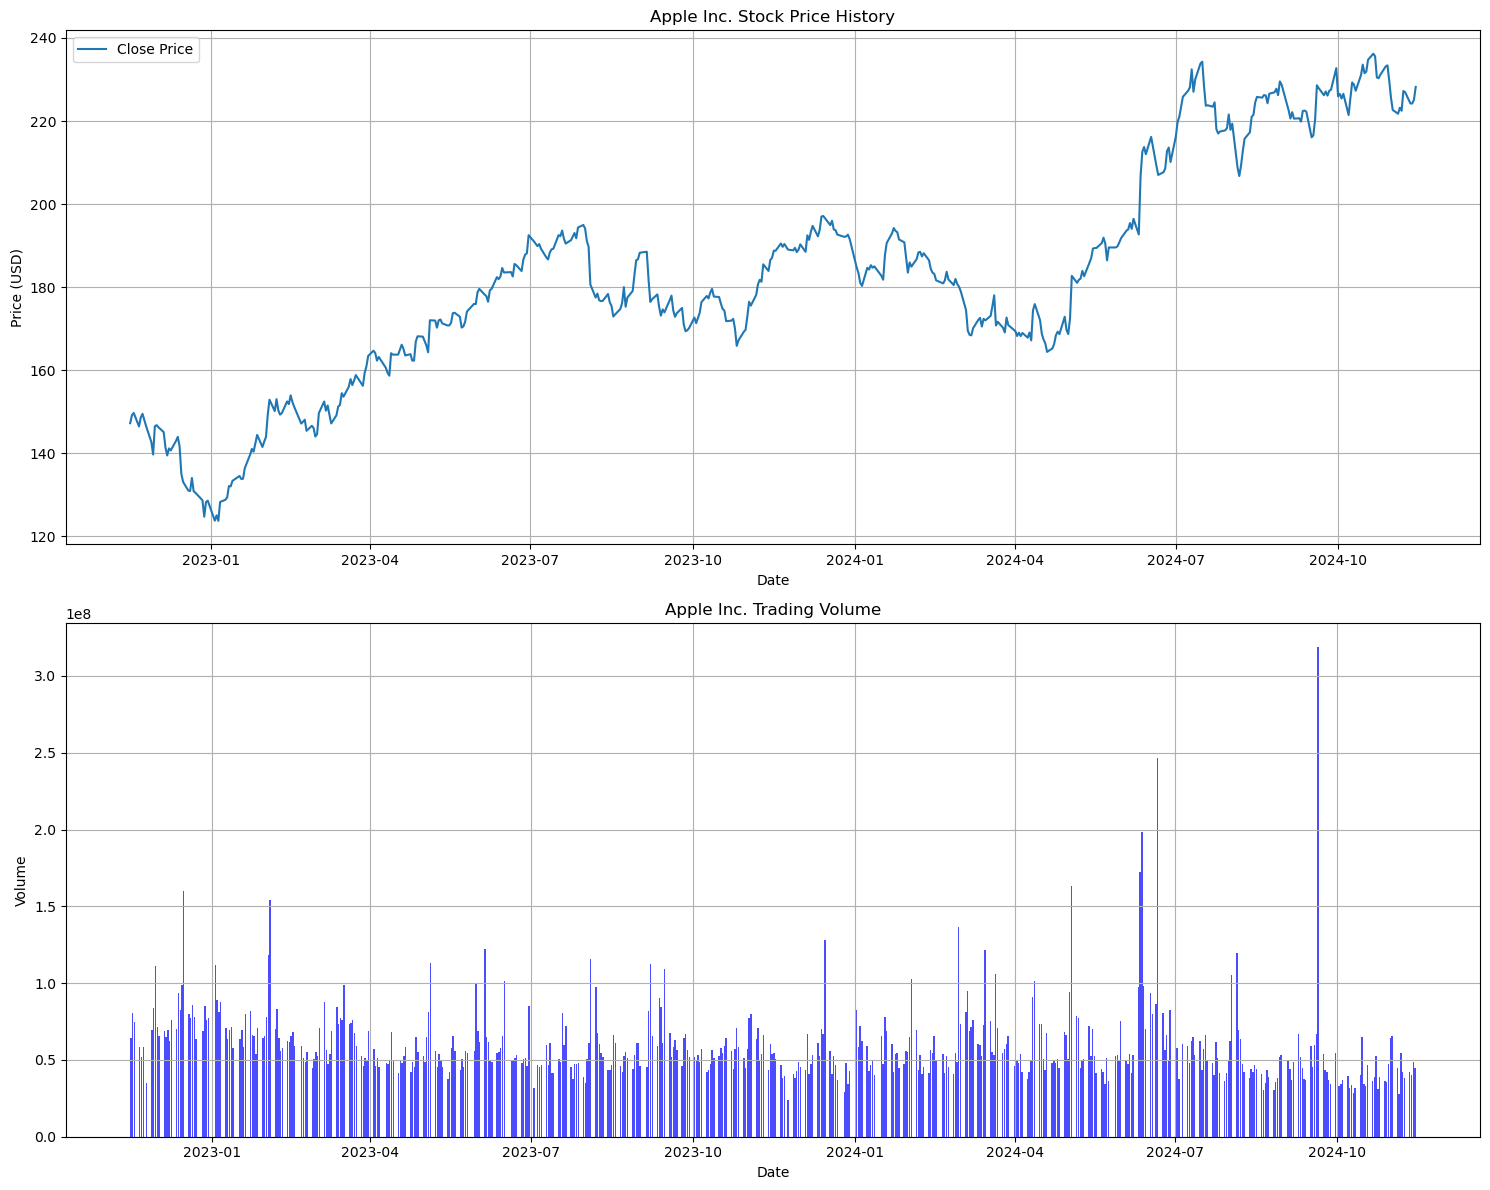

In [10]:


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_stock_data(ticker_symbol, start_date=None, end_date=None):
    """
    Fetch stock market data using Yahoo Finance API
    
    Parameters:
    ticker_symbol (str): Stock ticker symbol (e.g., 'AAPL', 'GOOGL')
    start_date (str): Start date in format 'YYYY-MM-DD'
    end_date (str): End date in format 'YYYY-MM-DD'
    """
    try:
        # Create Ticker object
        ticker = yf.Ticker(ticker_symbol)
        
        # Get historical data
        df = ticker.history(
            start=start_date,
            end=end_date,
            interval='1d'  # Daily data
        )
        
        # Reset index to make date a column
        df = df.reset_index()
        
        # Get company info
        info = ticker.info
        company_name = info.get('longName', ticker_symbol)
        
        return df, company_name
    
    except Exception as e:
        print(f"Error fetching data: {str(e)}")
        return None, None

def plot_stock_data(df, company_name):
    """
    Create visualizations of the stock data
    """
    # Create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Plot 1: Price History
    ax1.plot(df['Date'], df['Close'], label='Close Price')
    ax1.set_title(f'{company_name} Stock Price History')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)')
    ax1.grid(True)
    ax1.legend()
    
    # Plot 2: Volume
    ax2.bar(df['Date'], df['Volume'], alpha=0.7, color='blue')
    ax2.set_title(f'{company_name} Trading Volume')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def analyze_stock_data(df, company_name):
    """
    Perform basic stock analysis
    """
    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change() * 100
    
    # Calculate moving averages
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    
    # Print analysis
    print(f"\nAnalysis for {company_name}:")
    print("-" * 50)
    print(f"Current Price: ${df['Close'].iloc[-1]:.2f}")
    print(f"52-Week High: ${df['High'].max():.2f}")
    print(f"52-Week Low: ${df['Low'].min():.2f}")
    print(f"Average Daily Volume: {df['Volume'].mean():.0f}")
    print(f"Average Daily Return: {df['Daily_Return'].mean():.2f}%")
    print(f"Return Volatility: {df['Daily_Return'].std():.2f}%")
    print(f"Total Return: {((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100:.2f}%")

# Example usage
if __name__ == "__main__":
    # Example: Get Apple stock data for the last 2 years
    ticker_symbol = "AAPL"  # Apple Inc.
    end_date = datetime.now()
    start_date = (end_date - timedelta(days=2*365)).strftime('%Y-%m-%d')
    
    print(f"Fetching stock data for {ticker_symbol}...")
    df, company_name = get_stock_data(ticker_symbol, start_date)
    
    if df is not None:
        print("\nStock Data Summary:")
        print(f"Company: {company_name}")
        print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
        print(f"Total trading days: {len(df)}")
        
        # Analyze the data
        analyze_stock_data(df, company_name)
        
        # Create visualizations
        plot_stock_data(df, company_name)
    else:
        print("\nFailed to fetch data. Please check your connection and ticker symbol.")
        